# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]
- image: images/BTC_price.png

In [3]:
#hide
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
#hide
df_all = read()
df_all.index.name = 'date'
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


### Kainų kaita pandemijos metu

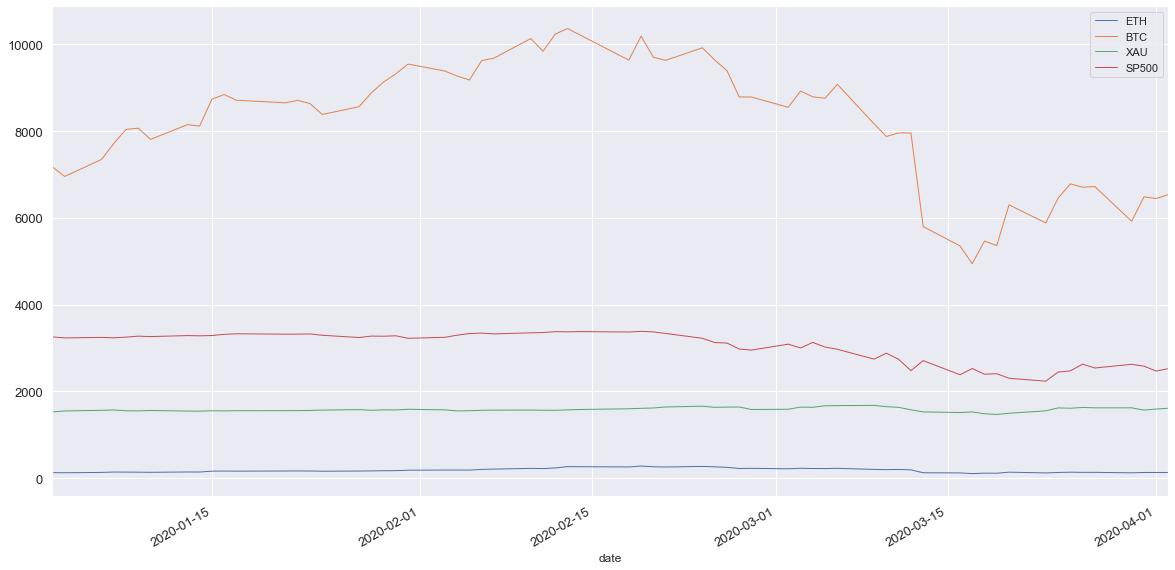

In [8]:
#hide_input
df_covid.plot(figsize=(20,10), linewidth=1, fontsize=13)
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [24]:
#hide_input
df_covid.corr()

,ETH,BTC,XAU,SP500
ETH,1.000000,0.842151,0.559575,0.506060
BTC,0.842151,1.000000,0.362074,0.825472
XAU,0.559575,0.362074,1.000000,0.052453
SP500,0.506060,0.825472,0.052453,1.000000


Koreliacijos matrica.

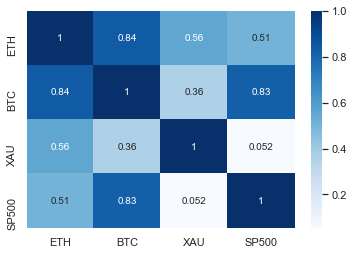

In [9]:
#hide_input
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues")
# plt.savefig('covid.eps', format='eps')